In [1]:
#https://towardsdatascience.com/spread-of-covid-19-with-interactive-data-visualization-521ac471226e
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import animation as F
from IPython.display import HTML
from random import randint
import random

In [2]:
covid = pd.read_csv('covid_19_data.csv')
covid.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid.rename(columns={
    'ObservationDate':'Date',
    'Province/State':'State',
    'Country/Region':'Country'},inplace=True)

In [4]:
covid=covid[["Date","State","Country","Confirmed","Deaths","Recovered"]]

In [5]:
grouped = covid.groupby(['Country','Date'])
covid_confirmed = grouped.sum().reset_index().sort_values(['Date'],ascending=False)

In [6]:
df = (covid_confirmed[covid_confirmed['Date'].eq("04/25/2020")].sort_values(by="Confirmed",ascending=False).head(10))

Text(0, 0.5, 'Country')

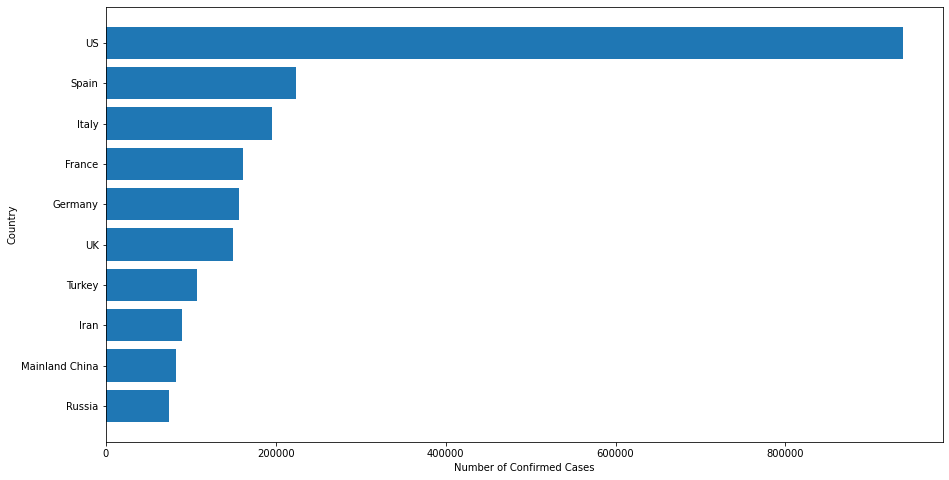

In [7]:
dff=df[::-1]
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Country'], dff['Confirmed'])
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country')

In [8]:
c_code = []
random.seed(1000)
for i in range(len(covid_confirmed.Country.unique())):
    c_code.append('#%06X' % randint(0, 0xFFFFFF))
    
colors = dict(zip(covid_confirmed.Country.unique(),c_code))

Text(1, 0.4, '04/25/2020')

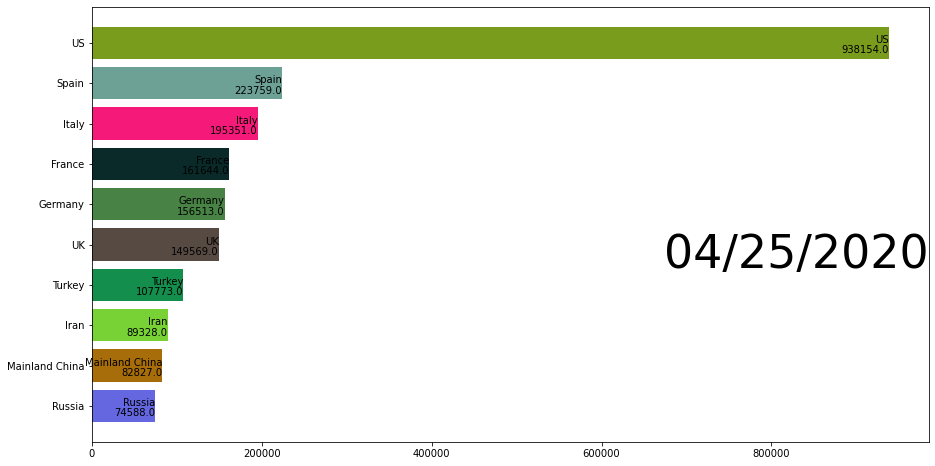

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
# pass colors values to `color=`
ax.barh(dff['Country'], dff['Confirmed'], color=[colors[x] for x in dff['Country']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Country'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-0.25,     value,           ha='right')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, "04/25/2020", transform=ax.transAxes, size=46, ha='right')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(date,case="Deaths"):
    dff= (covid_confirmed[covid_confirmed['Date'].eq(date)].sort_values(by=case,ascending=False).head(10))[::-1]
    ax.clear()
    ax.barh(dff['Country'], dff[case], color=["#980505","#CD1212","#D84E4E","#CB6262","#D39B5F","#F7EC10","#D0F710","#9CF710","#B4D67F","#969C8E"][::-1])
    dx = dff[case].max() / 200
    for i, (value, name) in enumerate(zip(dff[case], dff['Country'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, value, size=10, color='#17202A', ha='right', va='baseline')
        #ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=30, ha='right', weight=800)
    ax.text(0, 1.06, 'Number of Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The number of '+str(case)+' Cases upto 25 April 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'Manabi TV', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

# fig,ax = plt.subplots(figsize=(16,10)) #Set figure for plot
animator = F.FuncAnimation(fig,draw_barchart,frames=covid.Date.unique(), interval=300) #Building animation
HTML(animator.to_jshtml())
# animator.save('covid-19.mp4', writer="ffmpeg")